In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
price_data = pd.read_csv("../price data/iDhP/candles_btc-usd_1h.csv")
price_data['timestamp'] = [pd.Timestamp(t) for t in price_data['timestamp']]
price_data['from'] = [pd.Timestamp(t) for t in price_data['from']]
price_data['to'] = [pd.Timestamp(t) for t in price_data['to']]
price_data.head()

,timestamp,exchange,market,base,quote,from,to,open,close,high,low,volume_base,volume_quote
0,2011-01-01 00:00:00,cccagg,btc-usd,btc,usd,2010-12-31 23:00:00,2011-01-01 00:00:00,0.29200,0.29200,0.3,0.292,117.551667,35.08125
1,2011-01-01 01:00:00,cccagg,btc-usd,btc,usd,2011-01-01 00:00:00,2011-01-01 01:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
2,2011-01-01 02:00:00,cccagg,btc-usd,btc,usd,2011-01-01 01:00:00,2011-01-01 02:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
3,2011-01-01 03:00:00,cccagg,btc-usd,btc,usd,2011-01-01 02:00:00,2011-01-01 03:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
4,2011-01-01 04:00:00,cccagg,btc-usd,btc,usd,2011-01-01 03:00:00,2011-01-01 04:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750


In [8]:
x = price_data[['timestamp','market','close']].copy()
"""
#simple moving average of price
#x['sma12'] = x.rolling(window=12)['close'].mean()
#x['sma24'] = x.rolling(window=24)['close'].mean()
#x['sma36'] = x.rolling(window=36)['close'].mean()
x['sma48'] = x.rolling(window=48)['close'].mean()

#log of close price
x['log_close'] = np.log(x['close'])

#log of simple moving averages
x['log_sma12'] = np.log(x['sma12'])
x['log_sma24'] = np.log(x['sma24'])
x['log_sma36'] = np.log(x['sma36'])
x['log_sma48'] = np.log(x['sma48'])

#diff of close price and smas
x['diff_close'] = x['close'].diff()
x['diff_sma12'] = x['sma12'].diff()
x['diff_sma24'] = x['sma24'].diff()
x['diff_sma36'] = x['sma36'].diff()
x['diff_sma48'] = x['sma48'].diff()

#log diff of close prices and smas
x['log_diff_close'] = x['diff_close'].diff()
x['log_diff_sma12'] = x['diff_sma12'].diff()
x['log_diff_sma24'] = x['diff_sma24'].diff()
x['log_diff_sma36'] = x['diff_sma36'].diff()
x['log_diff_sma48'] = x['diff_sma48'].diff()

# diff ratio 
x['diff_ratio_close'] = (x['diff_close']/x['close'])*100
x['diff_ratio_sma12'] = (x['diff_sma12']/x['sma12'])*100
x['diff_ratio_sma24'] = (x['diff_sma24']/x['sma24'])*100
x['diff_ratio_sma36'] = (x['diff_sma36']/x['sma36'])*100
x['diff_ratio_sma48'] = (x['diff_sma48']/x['sma48'])*100

"""
x

,timestamp,market,close
0,2011-01-01 00:00:00,btc-usd,0.29200
1,2011-01-01 01:00:00,btc-usd,0.29997
2,2011-01-01 02:00:00,btc-usd,0.29997
3,2011-01-01 03:00:00,btc-usd,0.29997
4,2011-01-01 04:00:00,btc-usd,0.29997
...,...,...,...
84740,2020-08-31 20:00:00,btc-usd,11729.83000
84741,2020-08-31 21:00:00,btc-usd,11677.84000
84742,2020-08-31 22:00:00,btc-usd,11639.61000
84743,2020-08-31 23:00:00,btc-usd,11660.79000


In [9]:
x.to_csv("generated_price_data/btc-usd_hourly.csv",index=False)

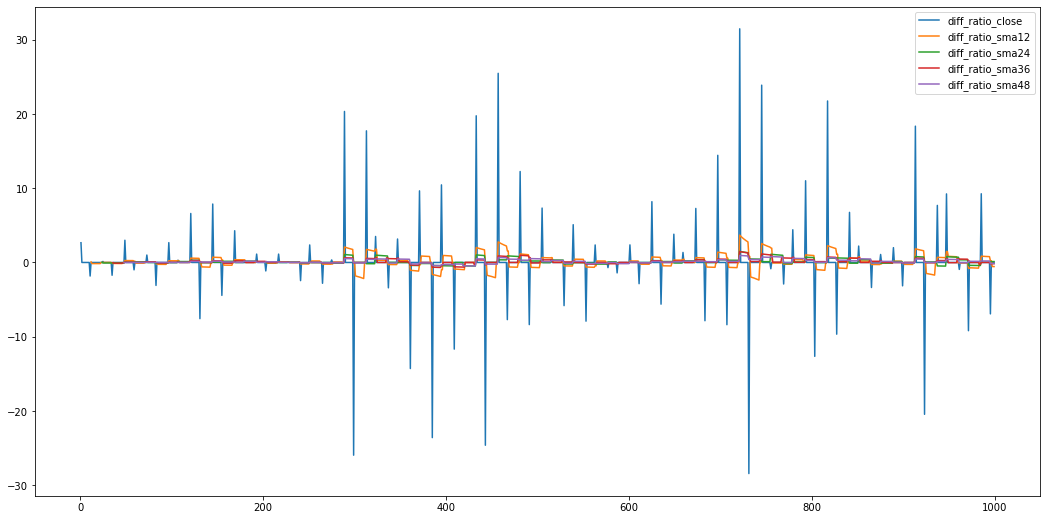

In [41]:
plt.figure(figsize=(18,9))

y = x[x.columns[2:]].copy()
j = 4
for i in range(5):
    y[y.columns[j*5+i]].plot()

plt.legend()
plt.show()